In [3]:
pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [6]:
X, y = load_iris(as_frame=True, return_X_y=True)
sepal_cols = ["sepal length (cm)", "sepal width (cm)"]
petal_cols = ["petal length (cm)", "petal width (cm)"]

preprocessor = ColumnTransformer(
    [
        ("scaler", StandardScaler(), sepal_cols),
        ("kbin", KBinsDiscretizer(encode="ordinal"), petal_cols),
    ],
    verbose_feature_names_out=False,
).set_output(transform="pandas")

X_out = preprocessor.fit_transform(X)
X_out.sample(n=5, random_state=0)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
114,-0.052506,-0.592373,3.0,4.0
62,0.189830,-1.973554,2.0,1.0
33,-0.416010,2.630382,0.0,1.0
107,1.765012,-0.362176,4.0,3.0
7,-1.021849,0.788808,1.0,1.0


In [8]:
from sklearn.datasets import load_diabetes
from sklearn.ensemble import HistGradientBoostingRegressor

X, y = load_diabetes(return_X_y=True, as_frame=True)

hist_no_interact = HistGradientBoostingRegressor(
    interaction_cst=[[i] for i in range(X.shape[1])], random_state=0
)
hist_no_interact.fit(X, y)

HistGradientBoostingRegressor(interaction_cst=[[0], [1], [2], [3], [4], [5],
                                               [6], [7], [8], [9]],
                              random_state=0)

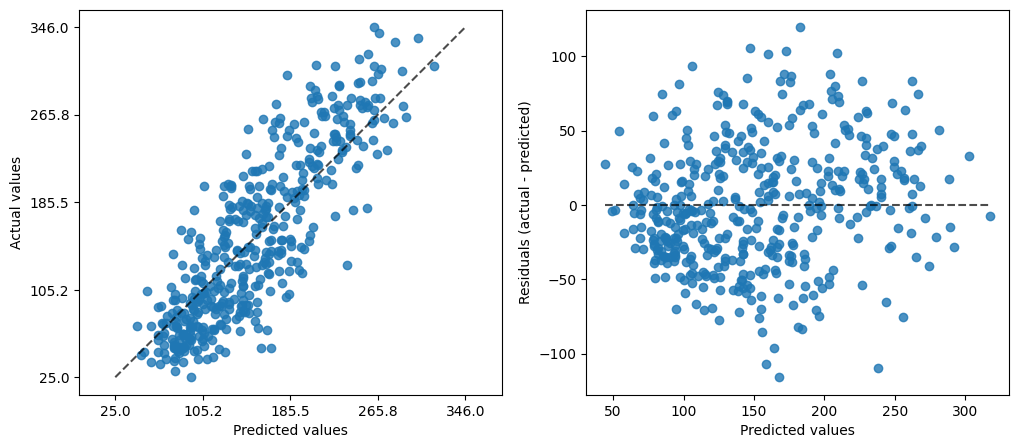

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import PredictionErrorDisplay

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
_ = PredictionErrorDisplay.from_estimator(
    hist_no_interact, X, y, kind="actual_vs_predicted", ax=axs[0]
)
_ = PredictionErrorDisplay.from_estimator(
    hist_no_interact, X, y, kind="residual_vs_predicted", ax=axs[1]
)